## Challenge Overview

## Introduction

KAGGLE is an online community of data scientists and machine learners, owned by Google. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. Kaggle got its start by offering machine learning competitions and now also offers a public data platform, a cloud-based workbench for data science, and short form AI education. On 8 March 2017, Google announced that they were acquiring Kaggle[1][2]<br/>

From 2017 kaggle start annual Machine Learning and Data Science Survey and in 2018 survey data challenge is come to place,This survey data EDA provides an overview of the industry on an aggregate scale, but it also leaves us wanting to know more about the many specific communities comprised within the survey. For that reason, we’re inviting the Kaggle community to dive deep into the survey datasets and help us tell the diverse stories of data scientists from around the world.<br\>


## Objective:

tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways, and that’s deliberate. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. That group can be defined in the macro (for example: anyone who does most of their coding in Python) or the micro (for example: female data science students studying machine learning in masters programs). This is an opportunity to be creative and tell the story of a community you identify with or are passionate about!

## Data

This survey received 19,717 usable respondents from 171 countries and territories. If a country or territory received less than 50 respondents, we grouped them into a group named “Other” for anonymity<br/>.
The survey was live from October 8th to October 28th. We allowed respondents to complete the survey at any time during that window. The median response time for those who participated in the survey was approximately 10 minutes.

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data

In [2]:
file_path="C:\\Users\\my\\Desktop\\kaggle-survey-2019\\multiple_choice_responses.csv"
kaggle=pd.read_csv(file_path)
kaggle=kaggle[1:]


# Feature Engineering

In [3]:
kaggle.Q1=kaggle.Q1.astype("category")
kaggle["Age_generation"]=kaggle.Q1
kaggle["Age_generation"]=kaggle["Age_generation"].replace(["35-39","40-44","45-49"],"Adults")
kaggle["Age_generation"]=kaggle["Age_generation"].replace(["18-21","22-24","25-29","30-34"],"Millennials")
kaggle["Age_generation"]=kaggle["Age_generation"].replace(["50-54","55-59","60-69","70+"],"elderly")

In [4]:
kaggle.Q3=kaggle.Q3.astype("category")
kaggle["continent"]= kaggle["Q3"]
kaggle["continent"]= kaggle["continent"].replace(["Malaysia","Philippines","Saudi Arabia",'Iran, Islamic Republic of...',"Viet Nam",'Republic of Korea',"India", 'Russia',"Greece","Pakistan","Japan","South Korea","Indonesia",'Hong Kong (S.A.R.)',"Turkey","Singapore","Israel","Taiwan",'Bangladesh','Thailand', 'China'],"Asia")
kaggle["continent"]= kaggle["continent"].replace(["Algeria",'Tunisia',"Nigeria","Morocco","South Africa","Egypt","Kenya"],"Africa")
kaggle["continent"]= kaggle["continent"].replace(['Austria',"Belgium","Romania",'Denmark','France','Germany','Netherlands','Italy','Ireland',"Ukraine",'Portugal',"Switzerland","Chile","Hungary","Norway","Belarus","Sweden","United Kingdom of Great Britain and Northern Ireland","Poland","Spain","Czech Republic"],"Europe")
kaggle["continent"]= kaggle["continent"].replace(["United States of America","Mexico","Canada"],"North America")
kaggle["continent"]= kaggle["continent"].replace(["Brazil","Argentina","Colombia",'Peru'],"South America")
kaggle["continent"]= kaggle["continent"].replace(['Australia',"New Zealand"],"'Australia")



In [5]:
kaggle.Q5=kaggle.Q5.astype("category")
kaggle["Employed"]=kaggle["Q5"]
kaggle["Employed"]=kaggle["Employed"].replace(["Data Scientist","Software Engineer","Other","Data Analyst","Research Scientist",
                                               "Business Analyst","Product/Project Manager","Data Engineer","Statistician",
                                               "DBA/Database Engineer"],"Employed")

In [6]:
kaggle.Q4=kaggle.Q4.astype("category")
kaggle["Educated"]=kaggle["Q4"]
kaggle["Educated"]=kaggle["Educated"].replace(["Master’s degree","Bachelor’s degree","Doctoral degree","Professional degree "],"Educated")

# Data Visualization

### 1. Demographic status

#### 1.1 Age

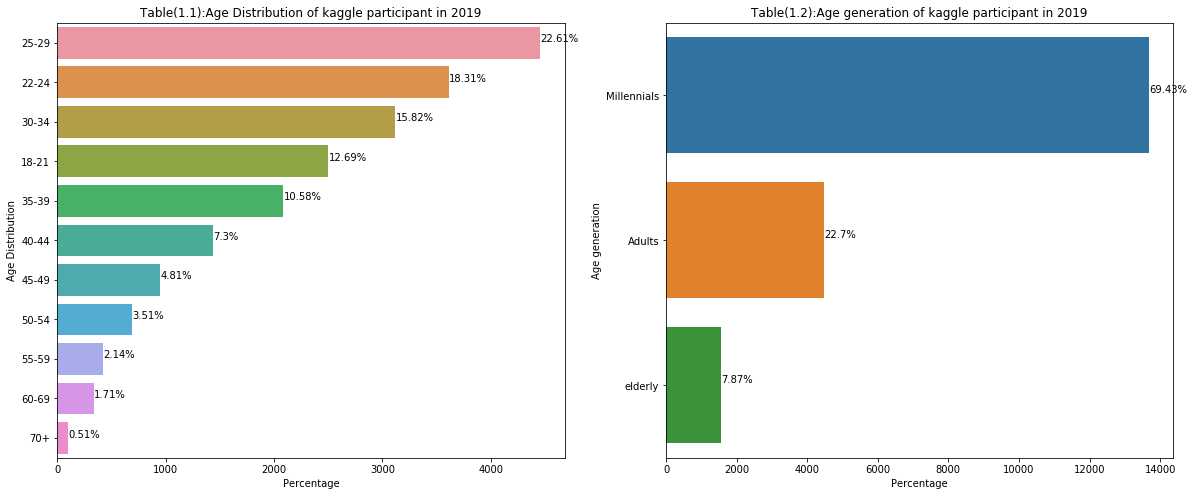

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax1=sns.countplot(y="Q1",data=kaggle, order=kaggle["Q1"].value_counts().index)
plt.title('Figure(1.1):Age Distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Age Distribution')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.subplot(1,2,2)
ax2=sns.countplot(y="Age_generation",data=kaggle, order=kaggle["Age_generation"].value_counts().index)
plt.title('Figure(1.2):Age generation of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Age generation')

for p in ax2.patches:
    ax2.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')



#### It's clearly that's millennials are dominating with 69.43% of kaggle participants in 2019 especially whom their ages are from 25-29 years old with 22.61% from kaggle participants in 2019

#### 1.2 Gender

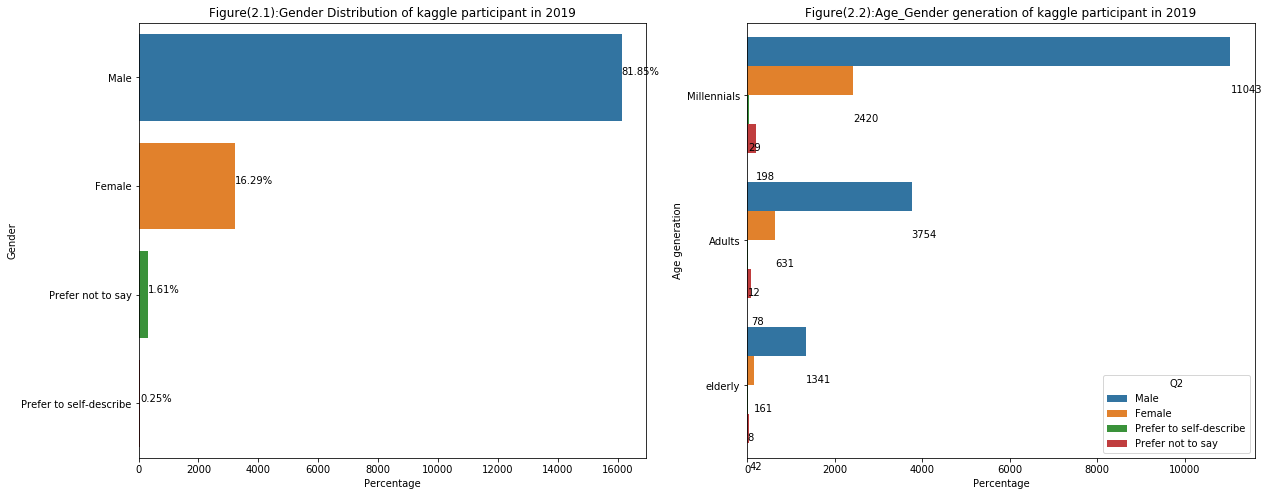

In [50]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax1=sns.countplot(y="Q2",data=kaggle, order=kaggle["Q2"].value_counts().index)
plt.title('Figure(2.1):Gender Distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Gender')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.subplot(1,2,2)
ax2=sns.countplot(y="Age_generation",data=kaggle, order=kaggle["Age_generation"].value_counts().index,hue="Q2")
plt.title('Figure(2.2):Age_Gender generation of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Age generation')

for p in ax2.patches:
    ax2.text(p.get_width()+.3, p.get_y()+.38, p.get_width())


 In figure(2.1) Male participant is dominating on kaggle on general with (81.85%) but however the figure (2.2) that the gap between male and female are decreasing with ages

#### 1.3 Location

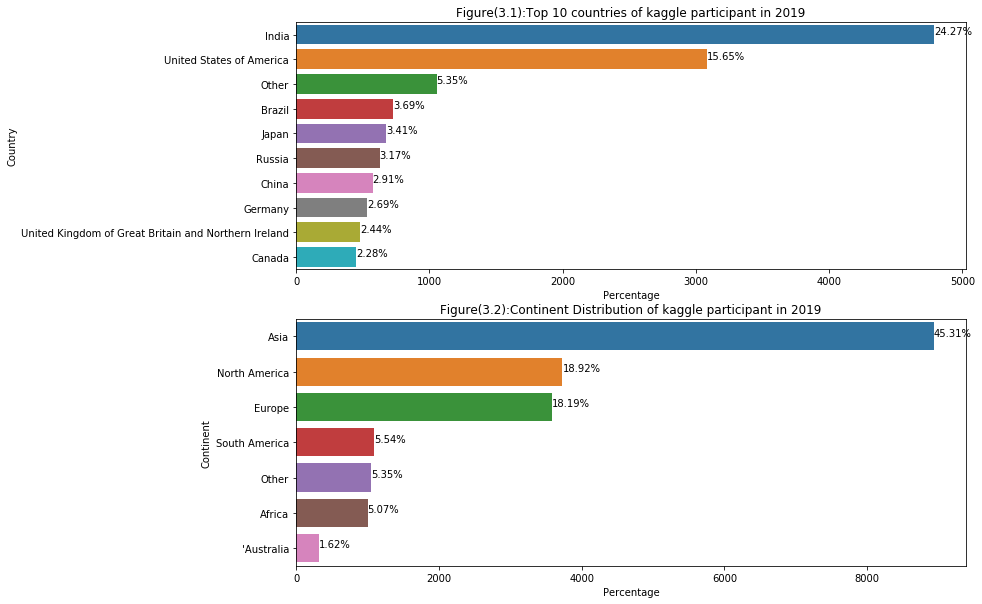

In [51]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
ax1=sns.countplot(y="Q3",data=kaggle, order=kaggle["Q3"].value_counts()[:10].index)
plt.title('Figure(3.1):Top 10 countries of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Country')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')
    
plt.subplot(2,1,2)
ax2=sns.countplot(y="continent",data=kaggle, order=kaggle["continent"].value_counts()[:10].index)

plt.title('Figure(3.2):Continent Distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Continent')

for p in ax2.patches:
    ax2.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

well, Its clearly that about quarter of kaggle participants are coming from India alone then US for it is not surprising to see that Asia has the higher proportion of kaggle participants with (45.31%) with distance from other continent , its also shows kaggle participant from North America and Europe are approximatley, where austrilia has the lower participation rate with 1.62%

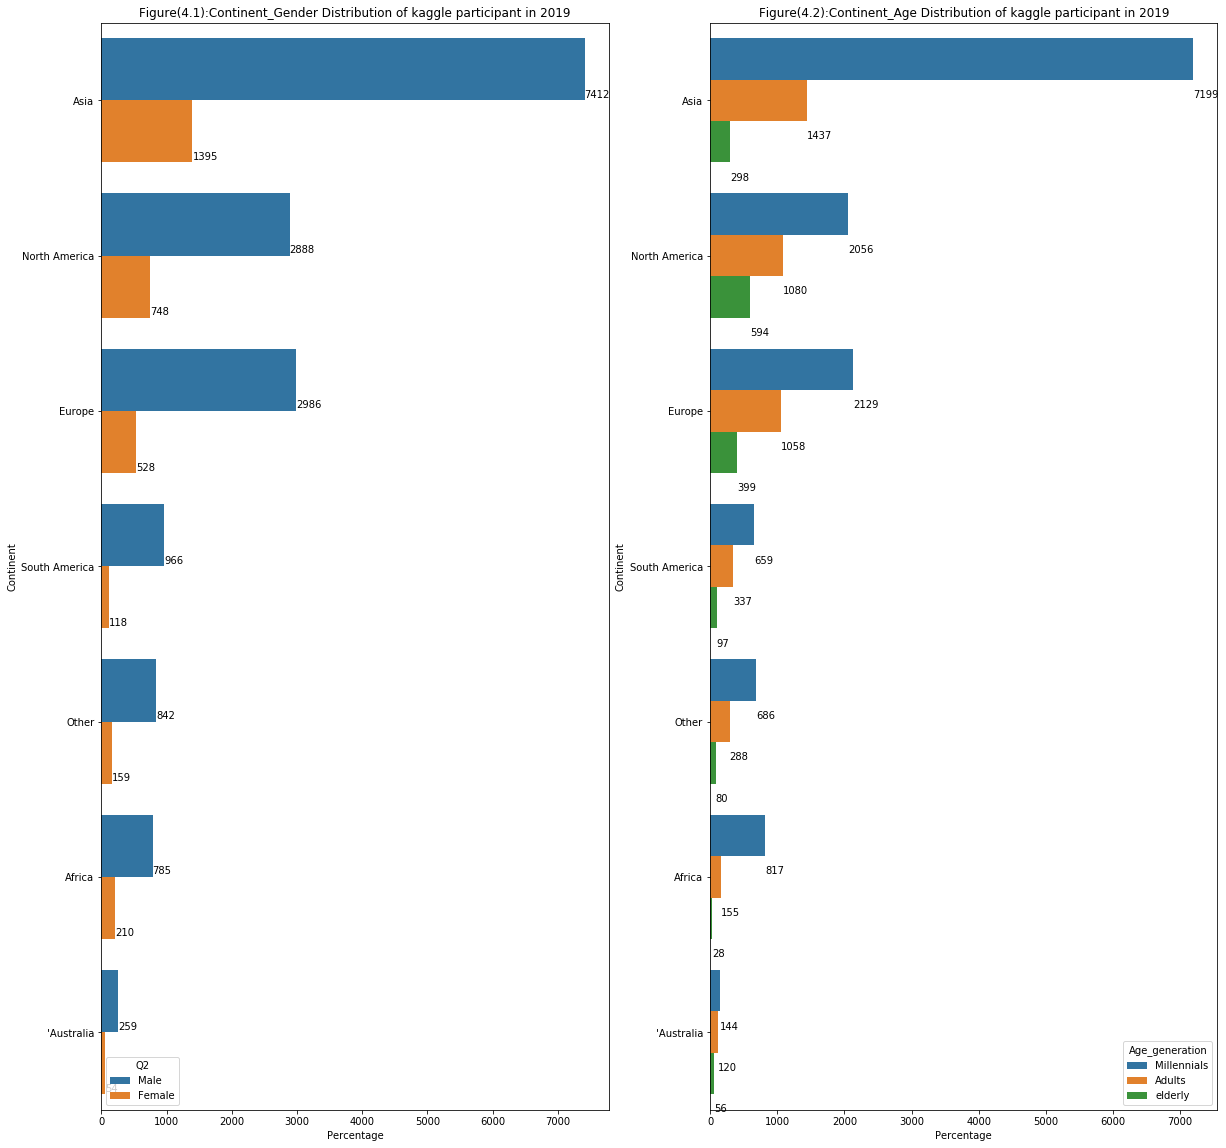

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax1=sns.countplot(y="continent",data=kaggle[(kaggle.Q2 == "Female") | (kaggle.Q2 == 'Male')], order=kaggle["continent"].value_counts()[:10].index,hue="Q2")
plt.title('Figure(4.1):Continent_Gender Distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Continent')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, p.get_width())
    
plt.subplot(1,2,2)
ax2=sns.countplot(y="continent",data=kaggle, order=kaggle["continent"].value_counts()[:10].index,hue="Age_generation")
plt.title('Figure(4.2):Continent_Age Distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Continent')

for p in ax2.patches:
    ax2.text(p.get_width()+.3, p.get_y()+.38, p.get_width())

Not really surprising to see that the Male are dominating across every continent and Asia has higher gender gap where Austrilia has lower gender gap same thing you can said about Age_generation where the millinerals are clearly are the dominate side for all continent but the gap is really stands is Asia and nearly not exist in Austrilia 

#### 1.4 Education

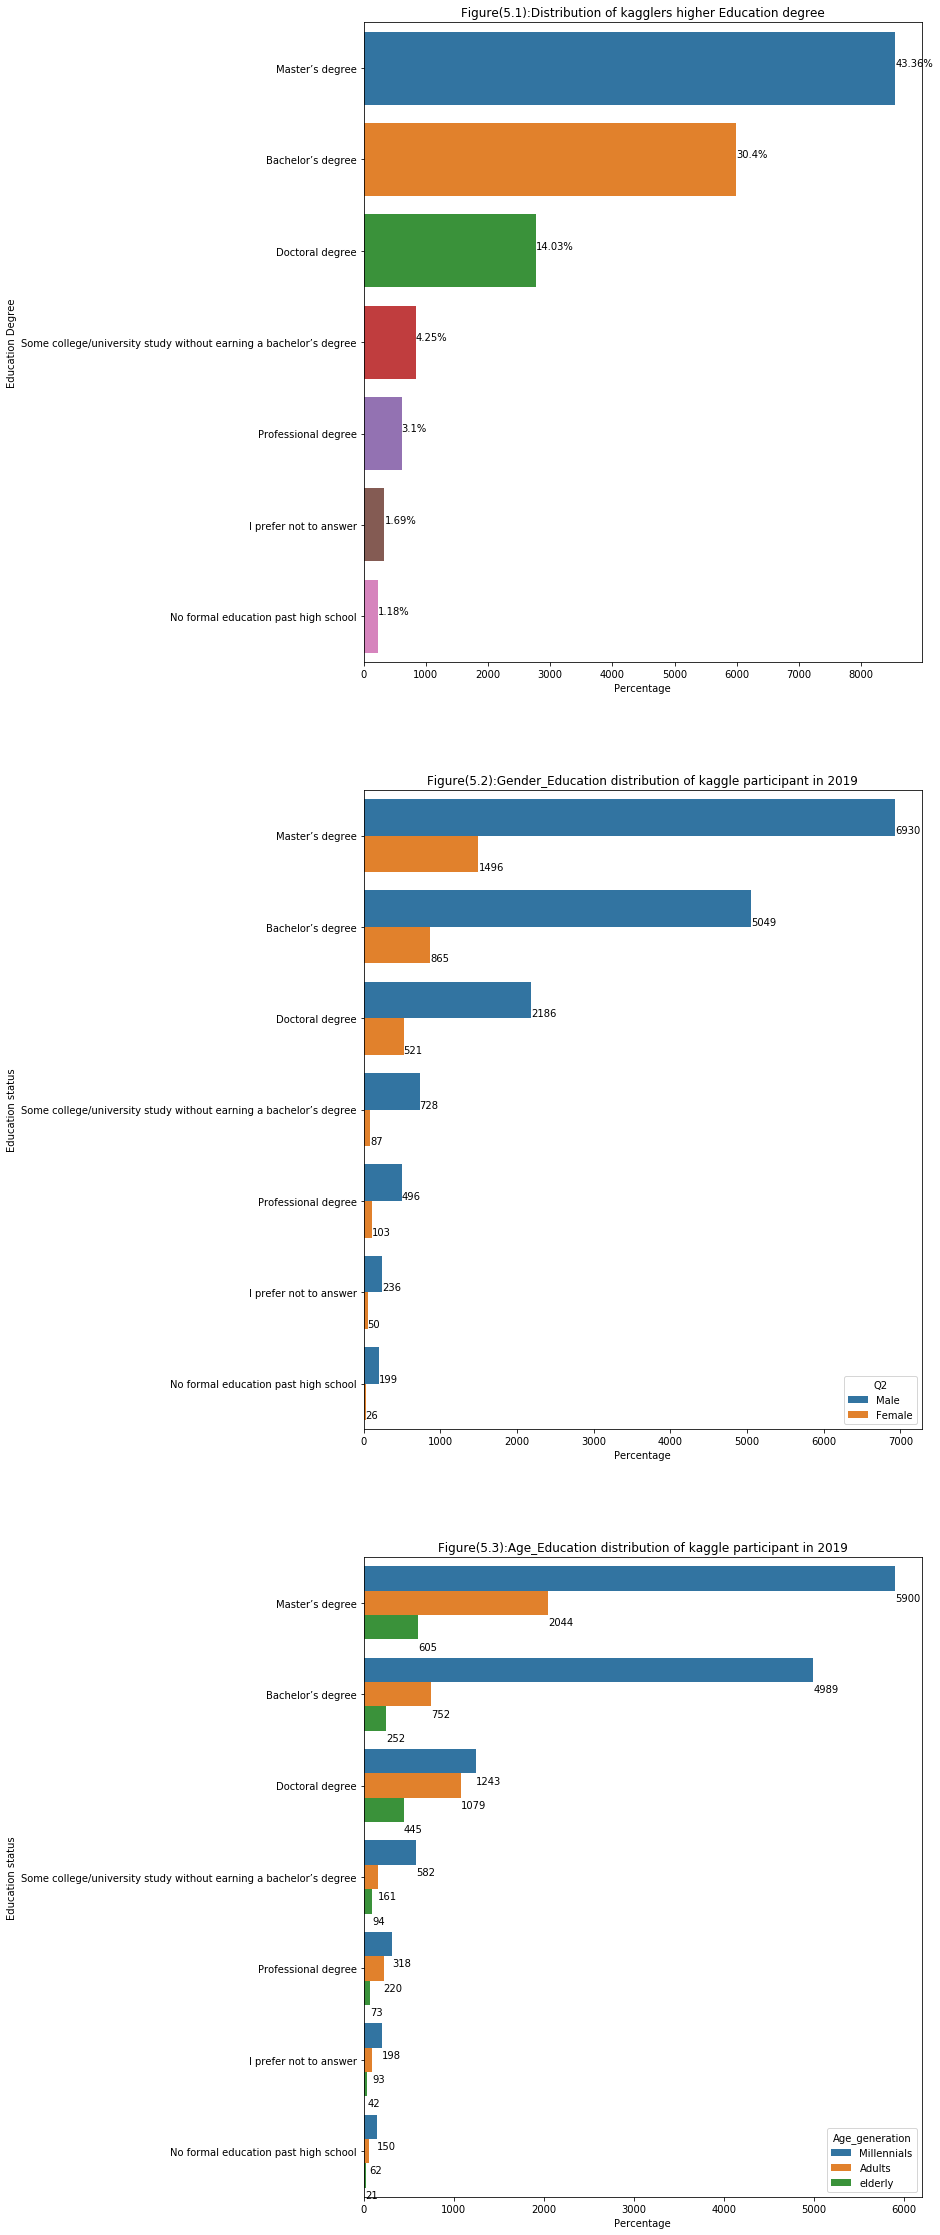

In [11]:
plt.figure(figsize=(10,40))
plt.subplot(3,1,1)
ax1=sns.countplot(y="Q4",data=kaggle,order=kaggle["Q4"].value_counts().index)
plt.title('Figure(5.1):Distribution of kagglers higher Education degree')
plt.xlabel("Percentage")
plt.ylabel('Education Degree')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.subplot(3,1,2)
ax2=sns.countplot(y="Q4",data=kaggle[(kaggle.Q2 == "Female") | (kaggle.Q2 == 'Male')],order=kaggle["Q4"].value_counts().index,hue="Q2")
plt.title('Figure(5.2):Gender_Education distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Education status')
for p in ax2.patches:
    ax2.text(p.get_width()+.3, p.get_y()+.38, p.get_width())

plt.subplot(3,1,3)
ax3=sns.countplot(y="Q4",data=kaggle,order=kaggle["Q4"].value_counts().index,hue="Age_generation")
plt.title('Figure(5.3):Age_Education distribution of kaggle participant in 2019')
plt.xlabel("Percentage")
plt.ylabel('Education status')
for p in ax3.patches:
    ax3.text(p.get_width()+.3, p.get_y()+.38, p.get_width())

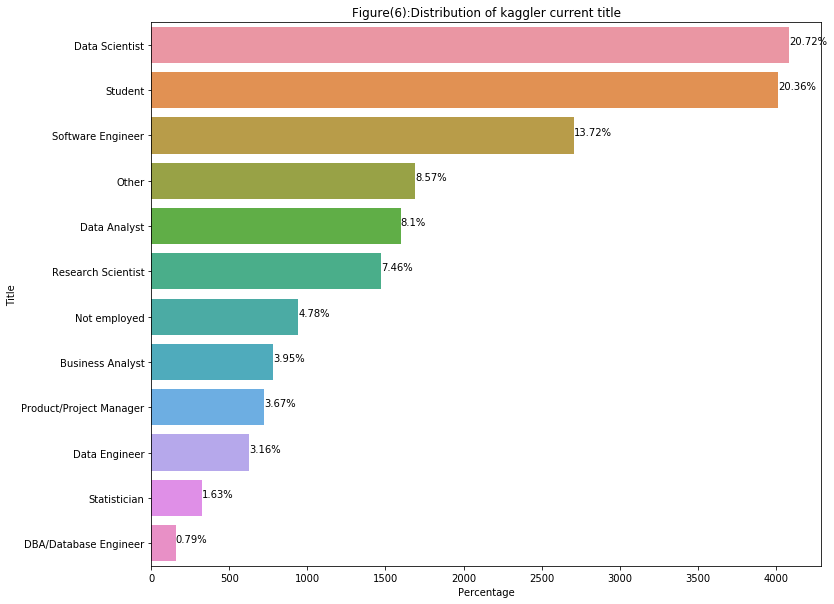

In [12]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y="Q5",data=kaggle,order=kaggle["Q5"].value_counts().index)
plt.title('Figure(6):Distribution of kaggler current title')
plt.xlabel("Percentage")
plt.ylabel('Title')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

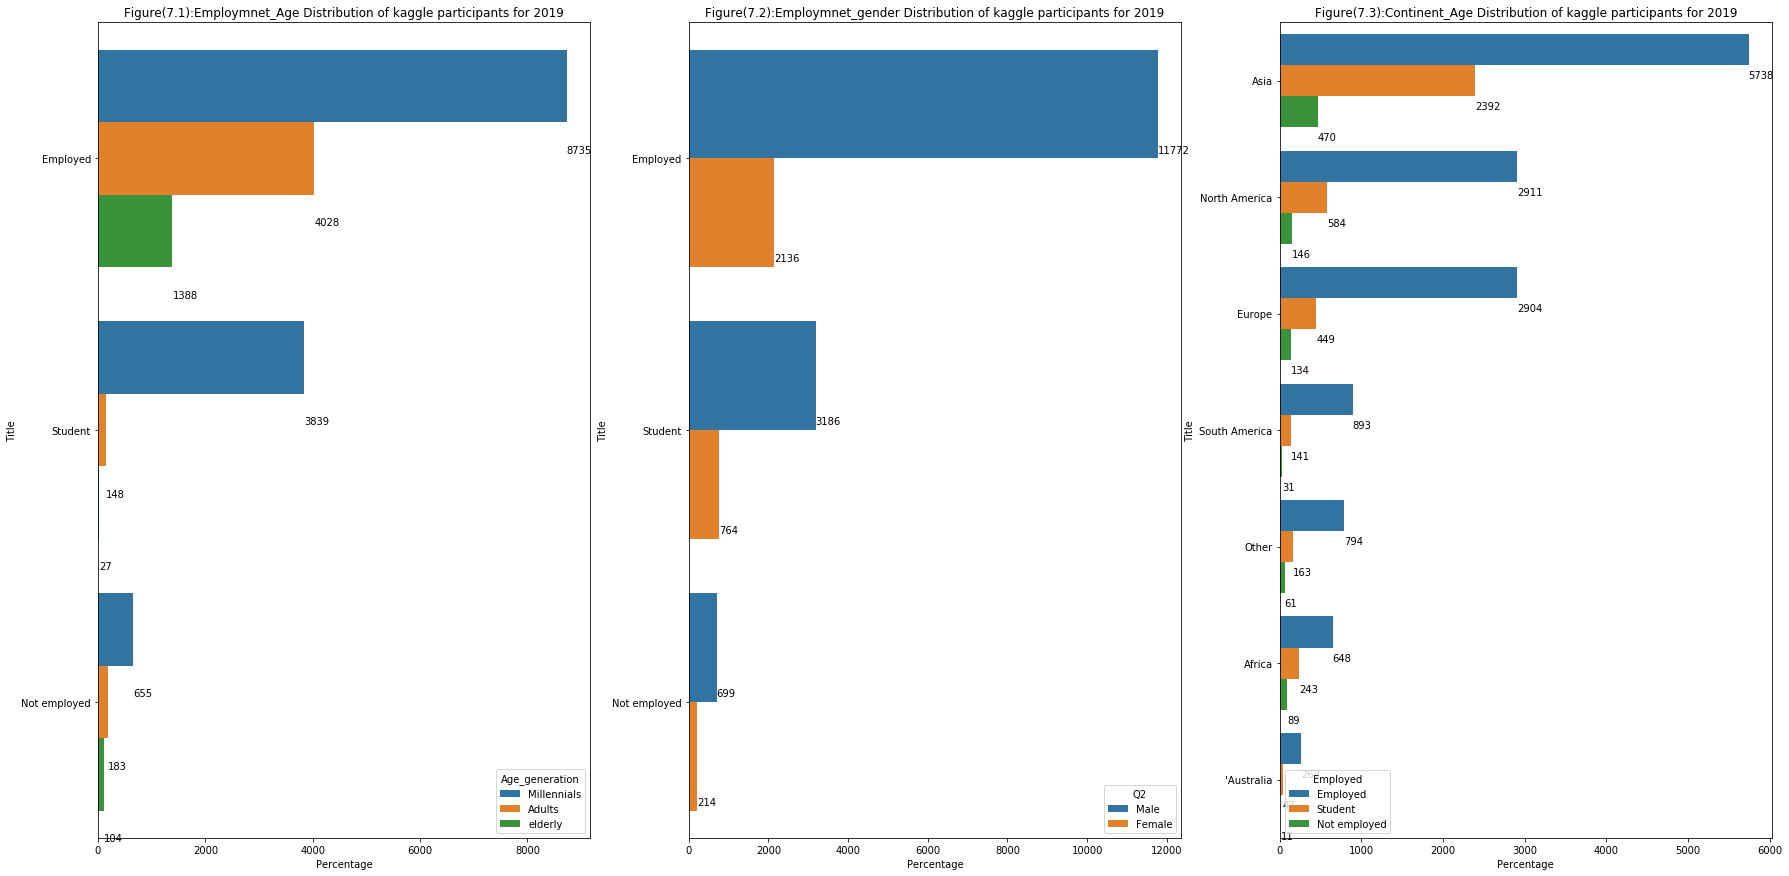

In [13]:
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
ax1=sns.countplot(y="Employed",data=kaggle,order=kaggle["Employed"].value_counts().index,hue="Age_generation")
plt.title('Figure(7.1):Employmnet_Age Distribution of kaggle participants for 2019')
plt.xlabel("Percentage")
plt.ylabel('Title')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, p.get_width())


plt.subplot(1,3,2)
ax2=sns.countplot(y="Employed",data=kaggle[(kaggle.Q2 == "Female") | (kaggle.Q2 == 'Male')],order=kaggle["Employed"].value_counts().index,hue="Q2")
plt.title('Figure(7.2):Employmnet_gender Distribution of kaggle participants for 2019')
plt.xlabel("Percentage")
plt.ylabel('Title')
for p in ax2.patches:
    ax2.text(p.get_width()+.3, p.get_y()+.38, p.get_width())



plt.subplot(1,3,3)
ax3=sns.countplot(y="continent",data=kaggle,order=kaggle["continent"].value_counts().index,hue="Employed")
plt.title('Figure(7.3):Continent_Age Distribution of kaggle participants for 2019')
plt.xlabel("Percentage")
plt.ylabel('Title')
for p in ax3.patches:
    ax3.text(p.get_width()+.3, p.get_y()+.38, p.get_width())


### Work Enviroment

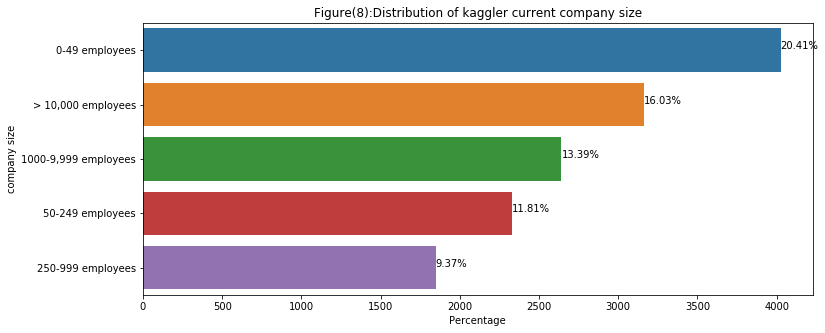

In [14]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q6",data=kaggle,order=kaggle["Q6"].value_counts().index)
plt.title('Figure(8):Distribution of kaggler current company size')
plt.xlabel("Percentage")
plt.ylabel('company size')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

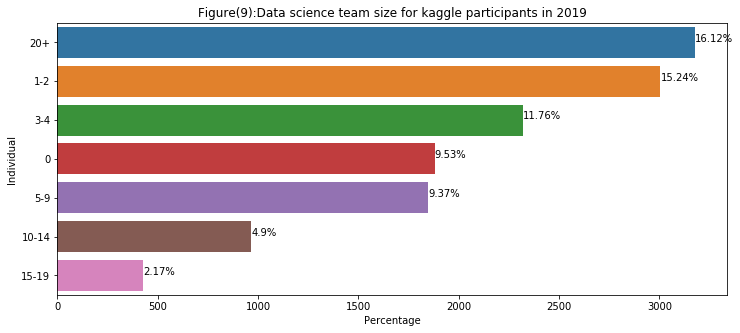

In [15]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q7",data=kaggle,order=kaggle["Q7"].value_counts().index)
plt.title("Figure(9):Data science team size for kaggle participants in 2019")
plt.xlabel("Percentage")
plt.ylabel('Individual')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

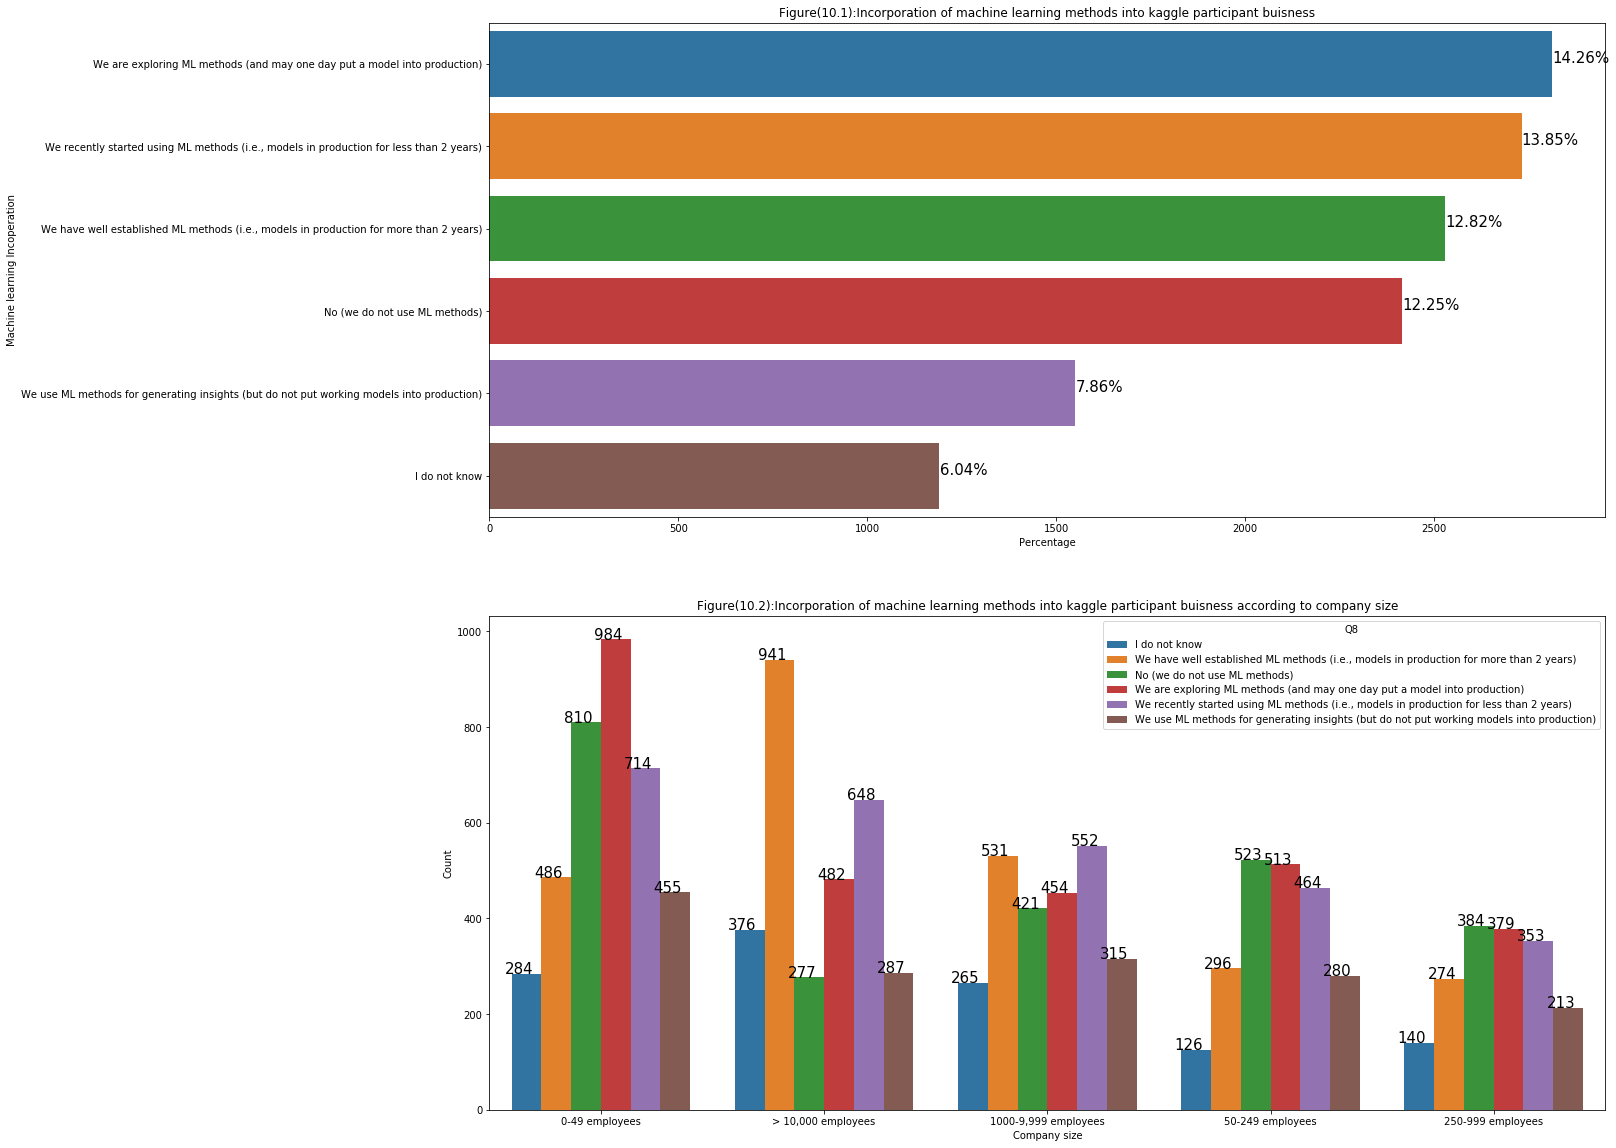

In [54]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
ax1=sns.countplot(y="Q8",data=kaggle,order=kaggle["Q8"].value_counts().index)
plt.title("Figure(10.1):Incorporation of machine learning methods into kaggle participant buisness")
plt.xlabel("Percentage")
plt.ylabel('Machine learning Incoperation')

for p in ax1.patches:
    ax1.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%', fontsize=15)

plt.subplot(2,1,2)
ax2=sns.countplot(x="Q6",data=kaggle,order=kaggle["Q6"].value_counts().index,hue="Q8")
plt.title("Figure(10.2):Incorporation of machine learning methods into kaggle participant buisness according to company size")
plt.xlabel("Company size")
plt.ylabel('Count')

for i in ax2.patches:
    ax2.text(i.get_x()-.03, i.get_height()+.5, i.get_height(), fontsize=15)
    
   

                                                    Frequency
Analyze and understand data to influence produc...       6091
Build prototypes to explore applying machine le...       4981
Experimentation and iteration to improve existi...       3705
Build and/or run the data infrastructure that m...       3566
Build and/or run a machine learning service tha...       3348
Do research that advances the state of the art ...       2359
None of these activities are an important part ...        531
Other                                                     249


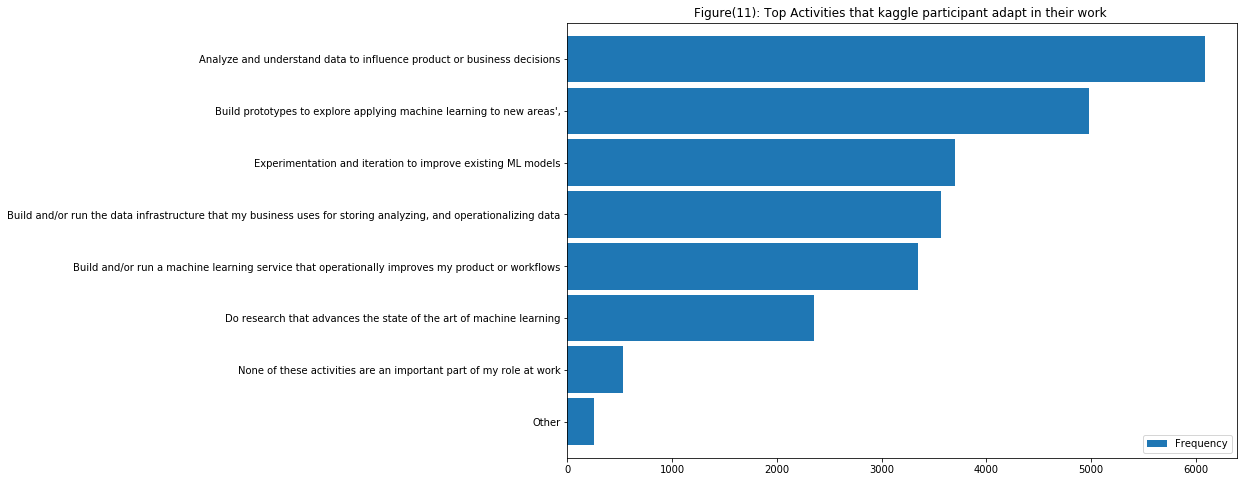

In [17]:
Q9         = kaggle.loc[:,"Q9_Part_1":"Q9_Part_8"].apply(lambda x: x.count()).to_frame()
Q9.index   = (["Analyze and understand data to influence product or business decisions",
               "Build and/or run the data infrastructure that my business uses for storing analyzing, and operationalizing data",
               "Build prototypes to explore applying machine learning to new areas',",
                "Build and/or run a machine learning service that operationally improves my product or workflows",
                "Experimentation and iteration to improve existing ML models",
                "Do research that advances the state of the art of machine learning",
                "None of these activities are an important part of my role at work","Other"])
Q9.columns = ["Frequency"]
Q9.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q9)

Q9.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('Figure(11): Top Activities that kaggle participant adapt in their work ')
plt.show()


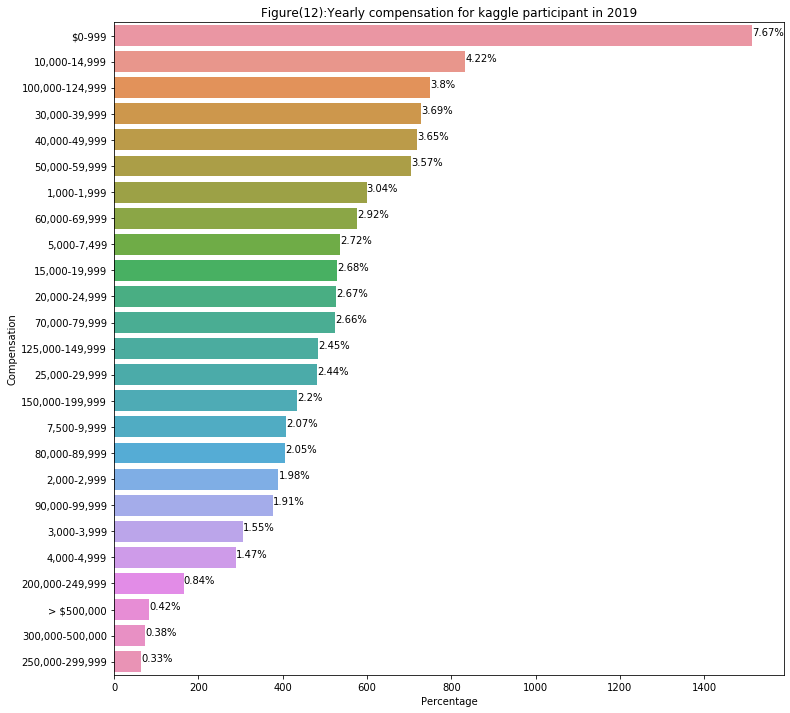

In [18]:
plt.figure(figsize=(12,12))
ax=sns.countplot(y="Q10",data=kaggle,order=kaggle["Q10"].value_counts().index)
plt.title("Figure(12):Yearly compensation for kaggle participant in 2019")
plt.xlabel("Percentage")
plt.ylabel('Compensation')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

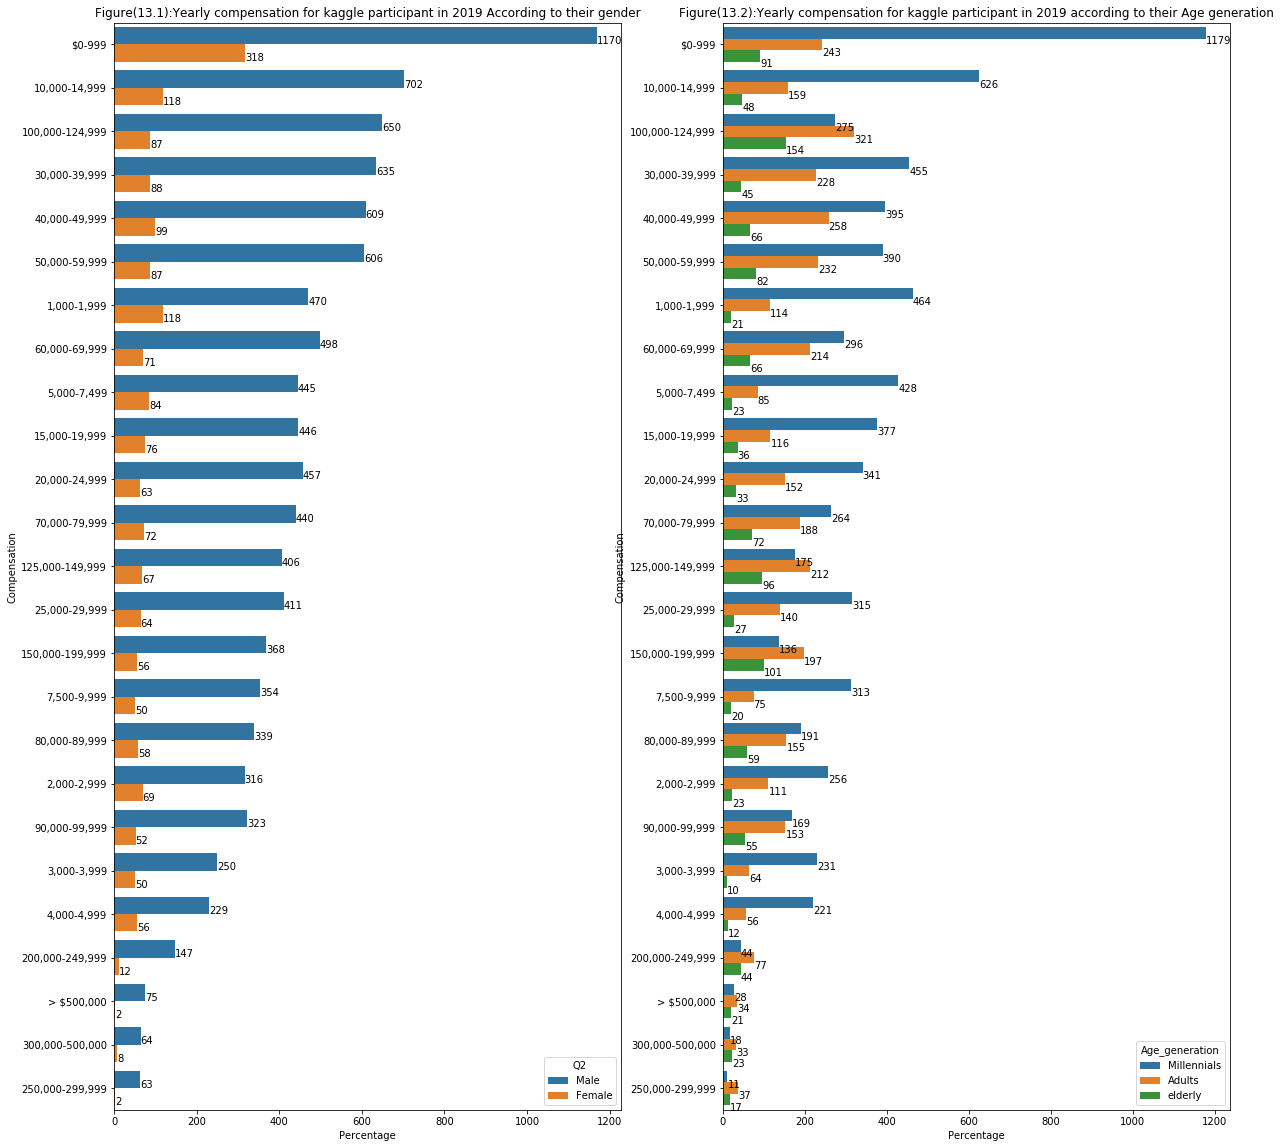

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax=sns.countplot(y="Q10",data=kaggle[(kaggle.Q2 == "Female") | (kaggle.Q2 == 'Male')],order=kaggle["Q10"].value_counts().index,hue="Q2")
plt.title("Figure(13.1):Yearly compensation for kaggle participant in 2019 According to their gender")
plt.xlabel("Percentage")
plt.ylabel('Compensation')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38,p.get_width())

plt.subplot(1,2,2)
ax=sns.countplot(y="Q10",data=kaggle,order=kaggle["Q10"].value_counts().index,hue="Age_generation")
plt.title("Figure(13.2):Yearly compensation for kaggle participant in 2019 according to their Age generation")
plt.xlabel("Percentage")
plt.ylabel('Compensation')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38,p.get_width())

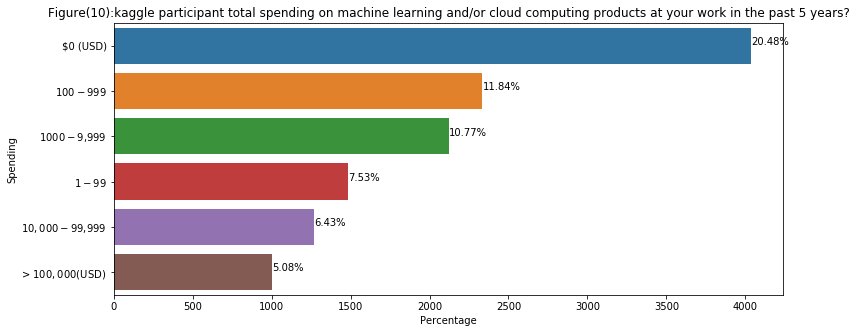

In [20]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q11",data=kaggle,order=kaggle["Q11"].value_counts().index)
plt.title("Figure(10):kaggle participant total spending on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Percentage")
plt.ylabel('Spending')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

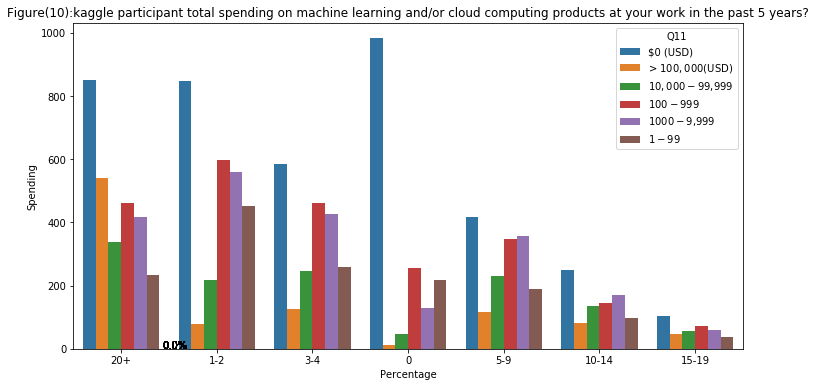

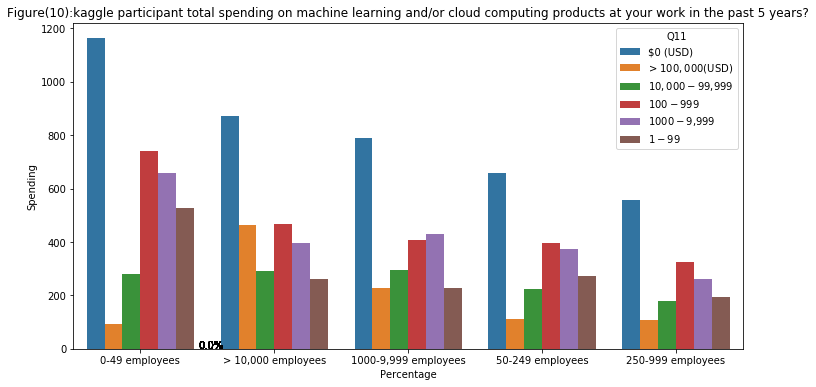

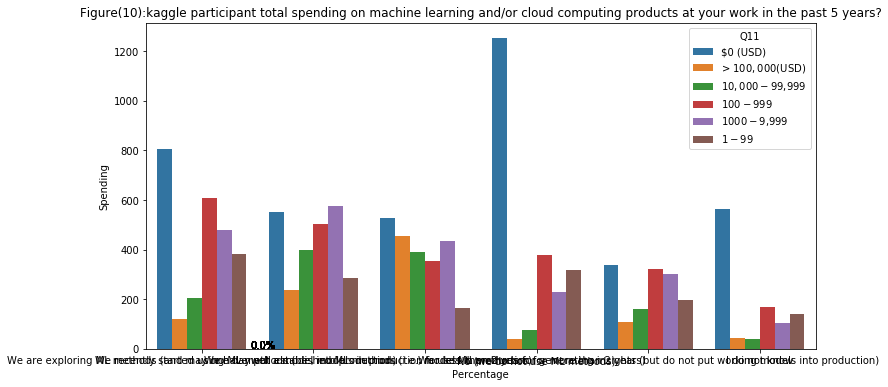

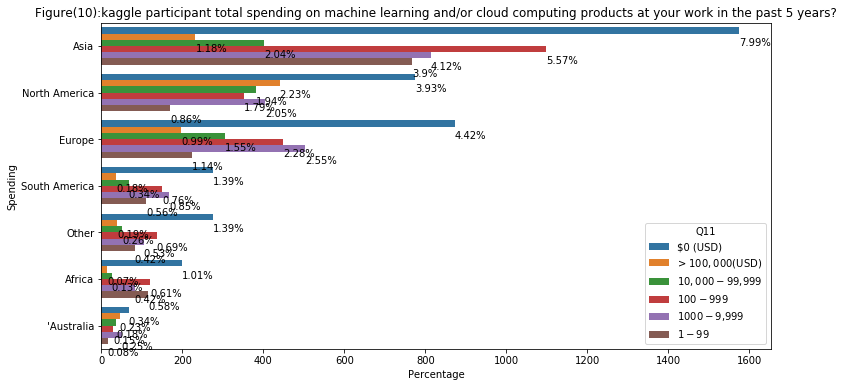

In [21]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="Q7",order=kaggle["Q7"].value_counts().index,hue="Q11",data=kaggle)
plt.title("Figure(10):kaggle participant total spending on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Percentage")
plt.ylabel('Spending')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.figure(figsize=(12,6))
ax=sns.countplot(x="Q6",order=kaggle["Q6"].value_counts().index,hue="Q11",data=kaggle)
plt.title("Figure(10):kaggle participant total spending on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Percentage")
plt.ylabel('Spending')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.figure(figsize=(12,6))
ax=sns.countplot(x="Q8",order=kaggle["Q8"].value_counts().index,hue="Q11",data=kaggle)
plt.title("Figure(10):kaggle participant total spending on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Percentage")
plt.ylabel('Spending')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.figure(figsize=(12,6))
ax=sns.countplot(y="continent",order=kaggle["continent"].value_counts().index,hue="Q11",data=kaggle)
plt.title("Figure(10):kaggle participant total spending on machine learning and/or cloud computing products at your work in the past 5 years?")
plt.xlabel("Percentage")
plt.ylabel('Spending')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

                      Frequency
Kaggle                    10751
Blogs                      9907
YouTube                    7538
Journal Publications       4472
Course Forums              3755
Twitter                    3740
Reddit                     3419
Slack Communities          2412
Podcasts                   2075
Hacker News                1804
other                      1184
None                        575


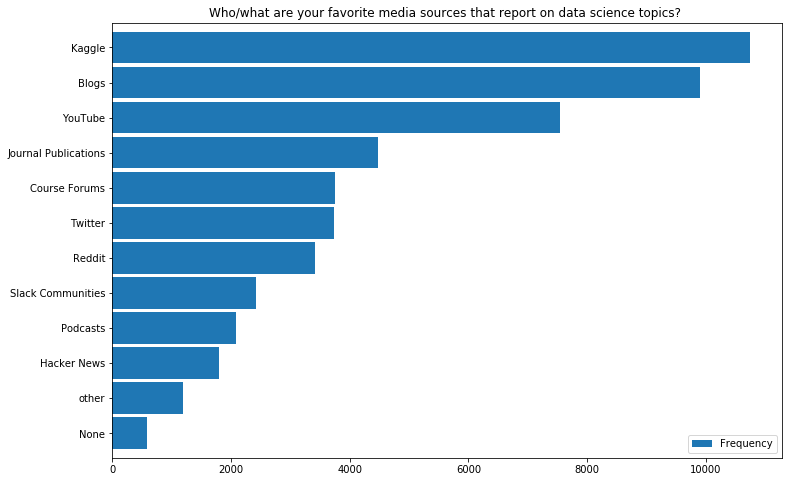

In [22]:
Q12         = kaggle.loc[:,"Q12_Part_1":"Q12_Part_12"].apply(lambda x: x.count()).to_frame()
Q12.index   = ["Twitter","Hacker News","Reddit","Kaggle","Course Forums","YouTube","Podcasts","Blogs","Journal Publications","Slack Communities","None","other"]
Q12.columns = ["Frequency"]
Q12.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q12)

Q12.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('Who/what are your favorite media sources that report on data science topics? ')
plt.show()

                    Frequency
Coursera                 8685
Kaggle Courses           5119
Udemy                    4804
University Courses       4478
DataCamp                 3843
edX                      3150
Udacity                  2953
Other                    1872
Fast.ai                  1520
None                     1491
LinkedIn Learning        1283
DataQuest                 743


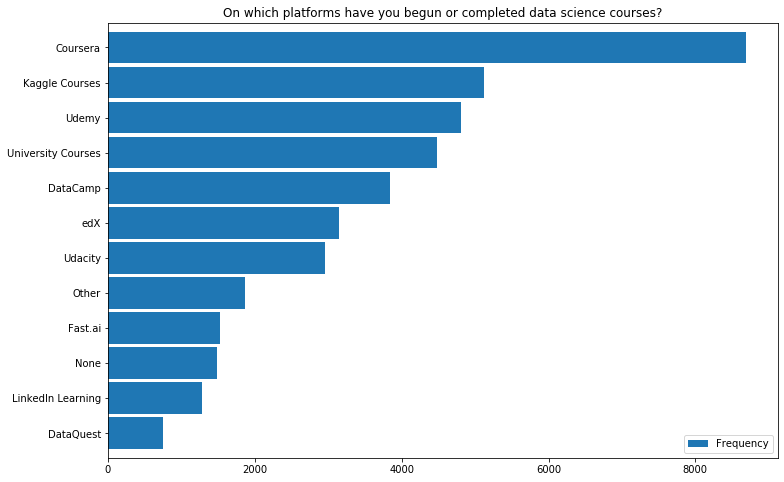

In [23]:
Q13         = kaggle.loc[:,"Q13_Part_1":"Q13_Part_12"].apply(lambda x: x.count()).to_frame()
Q13.index   = ["Udacity","Coursera","edX","DataCamp","DataQuest","Kaggle Courses","Fast.ai","Udemy","LinkedIn Learning",
               "University Courses","None","Other"]
Q13.columns = ["Frequency"]
Q13.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q13)

Q13.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('On which platforms have you begun or completed data science courses?')
plt.show()


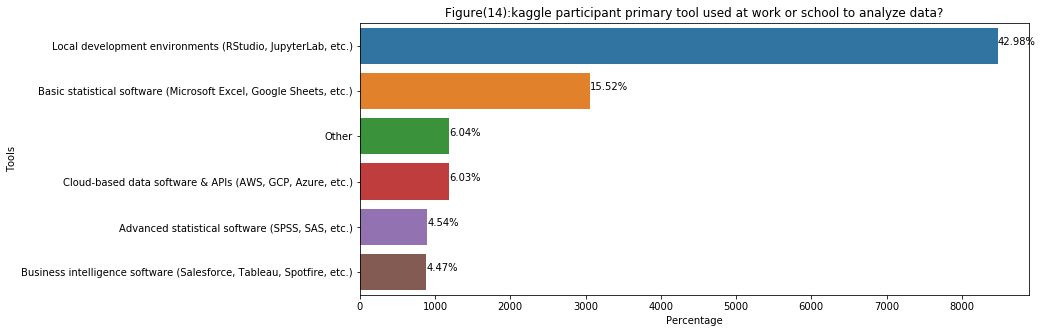

In [24]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q14",data=kaggle,order=kaggle["Q14"].value_counts().index)
plt.title("Figure(14):kaggle participant primary tool used at work or school to analyze data?")
plt.xlabel("Percentage")
plt.ylabel('Tools')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

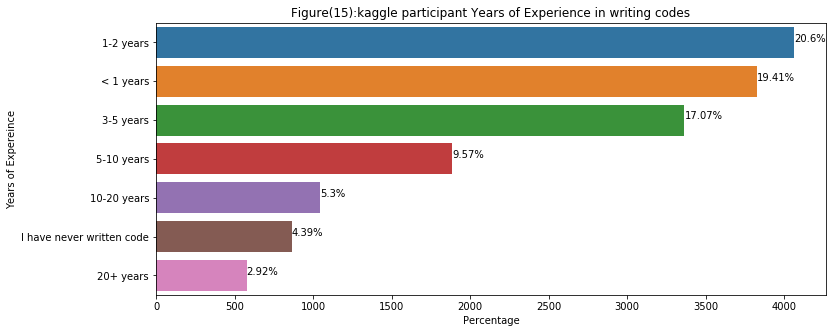

In [25]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q15",data=kaggle,order=kaggle["Q15"].value_counts().index)
plt.title("Figure(15):kaggle participant Years of Experience in writing codes")
plt.xlabel("Percentage")
plt.ylabel("Years of Expereince")

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

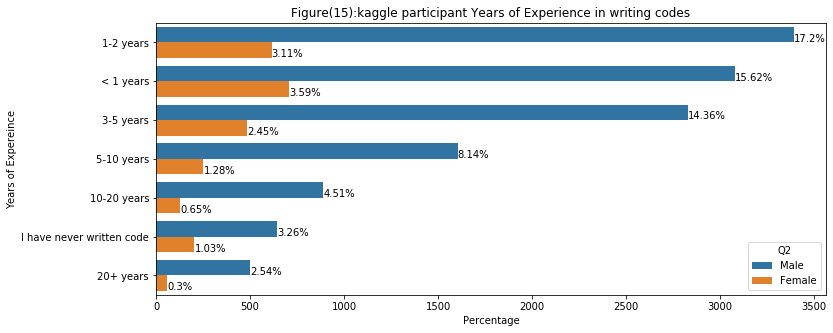

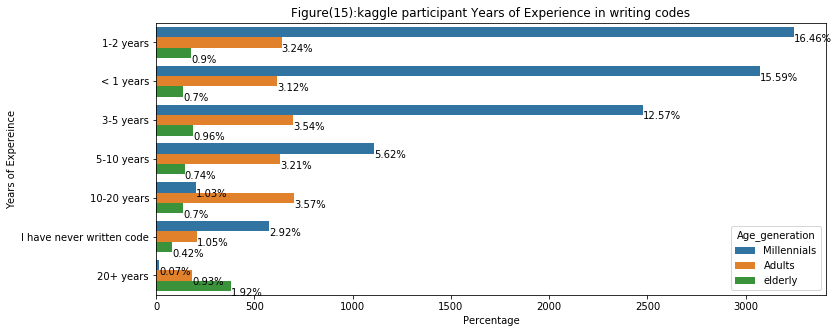

In [26]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q15",data=kaggle[(kaggle.Q2=="Female")|(kaggle.Q2=="Male")],order=kaggle["Q15"].value_counts().index,hue="Q2")
plt.title("Figure(15):kaggle participant Years of Experience in writing codes")
plt.xlabel("Percentage")
plt.ylabel("Years of Expereince")

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q15",data=kaggle,order=kaggle["Q15"].value_counts().index,hue="Age_generation")
plt.title("Figure(15):kaggle participant Years of Experience in writing codes")
plt.xlabel("Percentage")
plt.ylabel("Years of Expereince")

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

               Frequency
Jupyter            10804
Visual Studio       4534
Rstudio             4455
PyCharm             4224
Notepad++           3281
Spyder              3085
Sublime Text        2655
Vim / Emacs         1782
Matlab              1768
Atom                1487
Other                691
None                 238


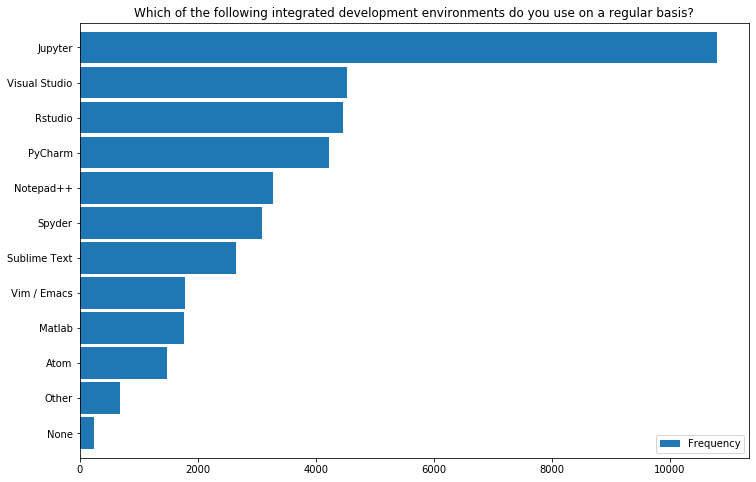

In [27]:
Q16         = kaggle.loc[:,"Q16_Part_1":"Q16_Part_12"].apply(lambda x: x.count()).to_frame()
Q16.index   = ["Jupyter","Rstudio","PyCharm","Atom","Matlab","Visual Studio","Spyder","Vim / Emacs","Notepad++","Sublime Text","None","Other"]
Q16.columns =["Frequency"]
Q16.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q16)

Q16.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('Which of the following integrated development environments do you use on a regular basis?')
plt.show()


                                Frequency
None                                 5177
Kaggle Notebooks                     4845
Google Colab                         4551
Binder/JupyterHub                    1681
Google Cloud Notebook Products       1121
Microsoft Azure Notebooks             855
AWS Notebook Products                 757
IBM Watson Studio                     669
Other                                 460
Paperspace/Gradient                   142
FloydHub                              101
Code Ocean                             76


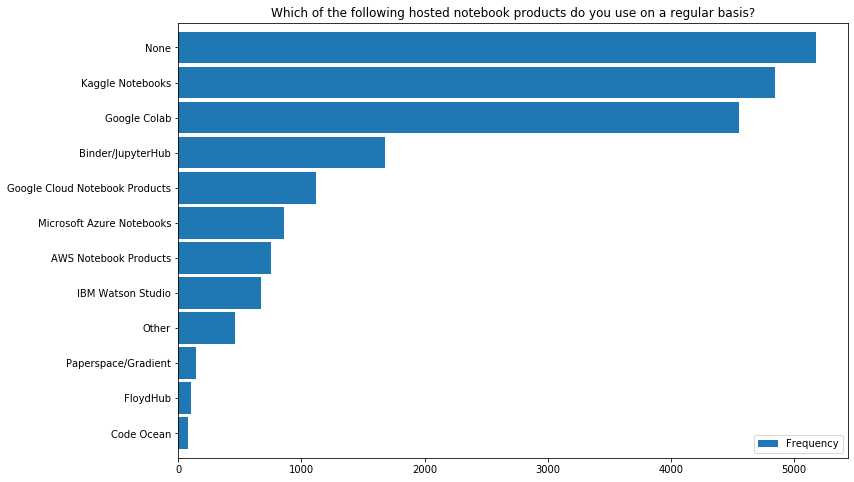

In [28]:
Q17         = kaggle.loc[:,"Q17_Part_1":"Q17_Part_12"].apply(lambda x: x.count()).to_frame()
Q17.columns = ["Frequency"]
Q17.index   = ["Kaggle Notebooks","Google Colab","Microsoft Azure Notebooks","Google Cloud Notebook Products",
               "Paperspace/Gradient","FloydHub","Binder/JupyterHub","IBM Watson Studio","Code Ocean","AWS Notebook Products",
               "None","Other"]
Q17.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q17)

Q17.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('Which of the following hosted notebook products do you use on a regular basis?')
plt.show()


            Frequency
Python          12841
SQl              6532
R                4588
Java             2267
C++              2256
Javascript       2174
Bash             2037
C                1672
MATLAB           1516
Other            1148
TypeScript        389
None               83


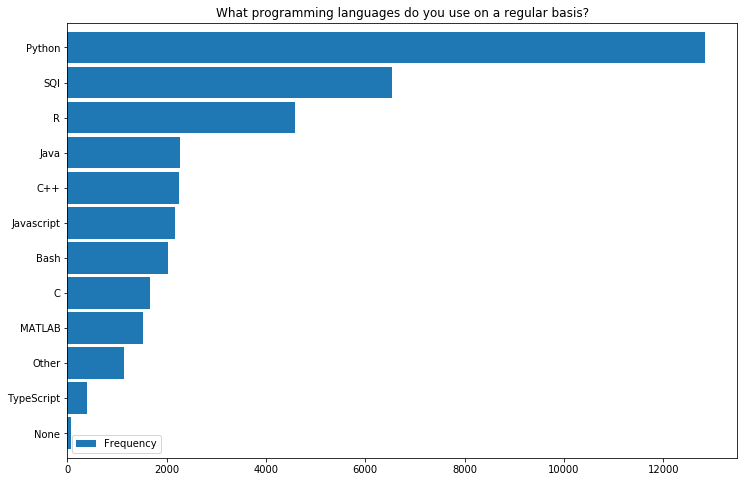

In [29]:
Q18         = kaggle.loc[:,"Q18_Part_1":"Q18_Part_12"].apply(lambda x: x.count()).to_frame()
Q18.columns = ["Frequency"]
Q18.index   = ["Python","R","SQl","C","C++","Java","Javascript","TypeScript","Bash","MATLAB","None","Other"]
Q18.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q18)

Q18.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('What programming languages do you use on a regular basis?')
plt.show()


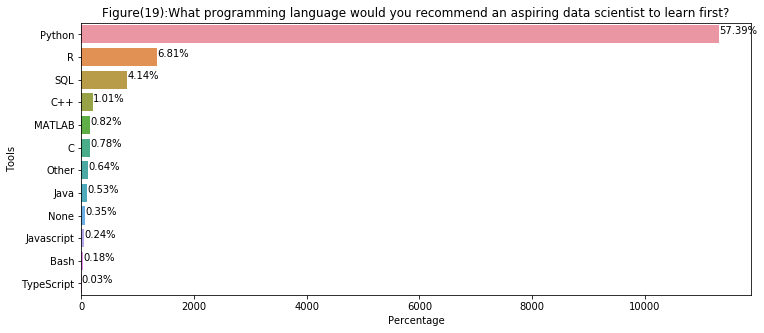

In [30]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q19",data=kaggle,order=kaggle["Q19"].value_counts().index)
plt.title("Figure(19):What programming language would you recommend an aspiring data scientist to learn first?")
plt.xlabel("Percentage")
plt.ylabel('Tools')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

                       Frequency
Matplotlib                 10516
Seaborn                     6905
Ggplot/ggplot2              4182
Plotly/Plotly Express       3217
Shiny                       1244
None                        1240
D3.js                       1078
Bokeh                       1043
Geoplotlib                   644
Leaflet/Folium               550
Other                        465
Altair                       167


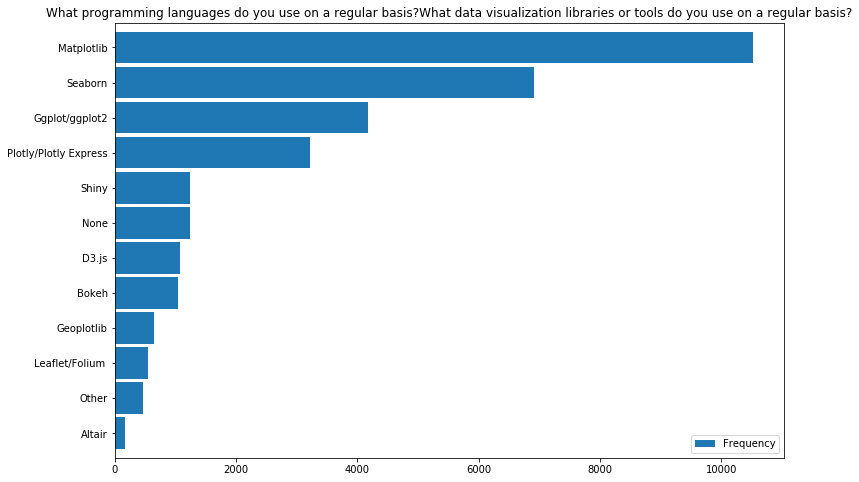

In [31]:
Q20=kaggle.loc[:,"Q20_Part_1":"Q20_Part_12"].apply(lambda x: x.count()).to_frame()
Q20.columns=["Frequency"]
Q20.index=["Ggplot/ggplot2","Matplotlib","Altair","Shiny","D3.js","Plotly/Plotly Express","Bokeh","Seaborn","Geoplotlib",
           "Leaflet/Folium ","None","Other"]
Q20.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q20)

Q20.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('What programming languages do you use on a regular basis?What data visualization libraries or tools do you use on a regular basis?')
plt.show()


                    Frequency
CPUs                    10472
GPUs                     6638
None/I do not know       2449
TPUs                      496
Other                     108


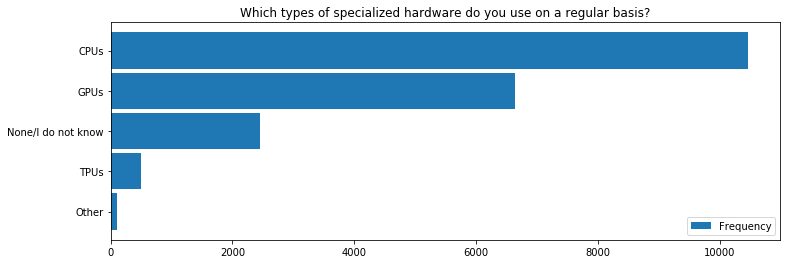

In [32]:
Q21         = kaggle.loc[:,"Q21_Part_1":"Q21_Part_5"].apply(lambda x: x.count()).to_frame()
Q21.columns = ["Frequency"]
Q21.index   = ["CPUs","GPUs","TPUs","None/I do not know","Other"]
Q21.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q21)

Q21.plot.barh(width=0.9,figsize=(12, 4))
plt.gca().invert_yaxis()
plt.title('Which types of specialized hardware do you use on a regular basis?')
plt.show()


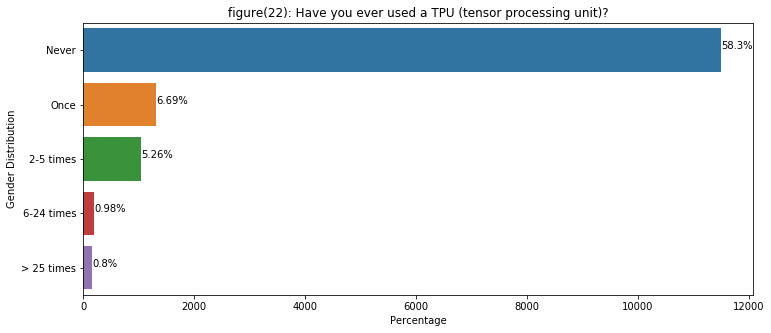

In [33]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q22",data=kaggle,order=kaggle["Q22"].value_counts().index)
plt.title('figure(22): Have you ever used a TPU (tensor processing unit)?')
plt.xlabel("Percentage")
plt.ylabel('Gender Distribution')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

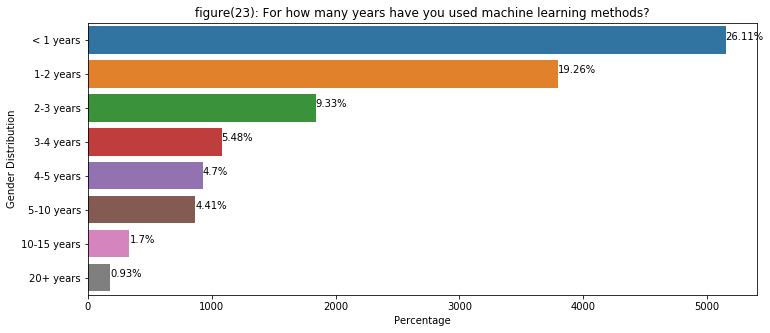

In [34]:
plt.figure(figsize=(12,5))
ax=sns.countplot(y="Q23",data=kaggle,order=kaggle["Q23"].value_counts().index)
plt.title('figure(23): For how many years have you used machine learning methods?')
plt.xlabel("Percentage")
plt.ylabel('Gender Distribution')

for p in ax.patches:
    ax.text(p.get_width()+.3, p.get_y()+.38, str(round((p.get_width()/len(kaggle))*100, 2))+'%')

                                  Frequency
Linear or Logistic Regression         10223
Decision Trees or Random Forests       8490
Gradient Boosting Machines             5539
Convolutional Neural Networks          5450
Bayesian Approaches                    3725
Recurrent Neural Networks              3389
Dense Neural Networks                  3323
None                                   1186
Generative Adversarial Networks         977
Transformer Networks                    907
Evolutionary Approaches                 866
Other                                   421


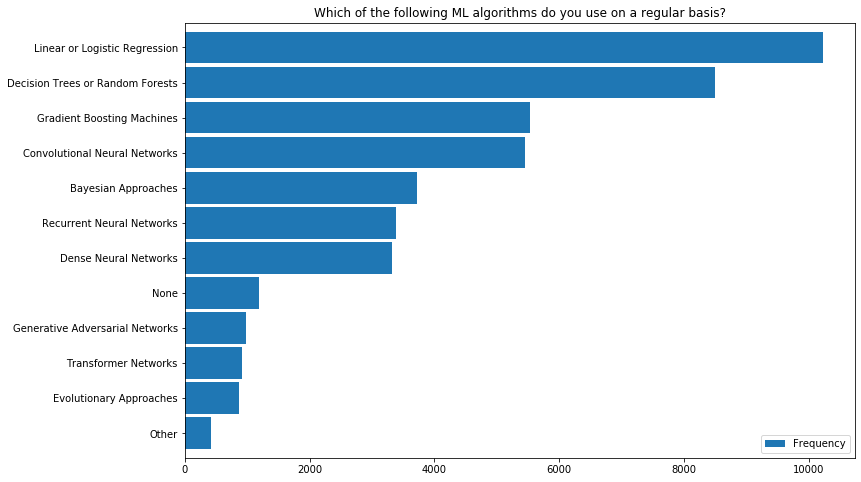

In [35]:
Q24         = kaggle.loc[:,"Q24_Part_1":"Q24_Part_12"].apply(lambda x: x.count()).to_frame()
Q24.columns = ["Frequency"]
Q24.index   = ["Linear or Logistic Regression","Decision Trees or Random Forests","Gradient Boosting Machines","Bayesian Approaches",
              "Evolutionary Approaches","Dense Neural Networks","Convolutional Neural Networks","Generative Adversarial Networks",
              "Recurrent Neural Networks","Transformer Networks","None","Other"]
Q24.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q24)

Q24.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('Which of the following ML algorithms do you use on a regular basis?')
plt.show()

                                         Frequency
None                                          7822
Automated model selection                     3200
Automated data augmentation                   1800
Automated hyperparameter tuning               1778
Automated feature engineering/selection       1505
Automation of full ML pipelines               1178
Automated model architecture searches          450
Other                                          229


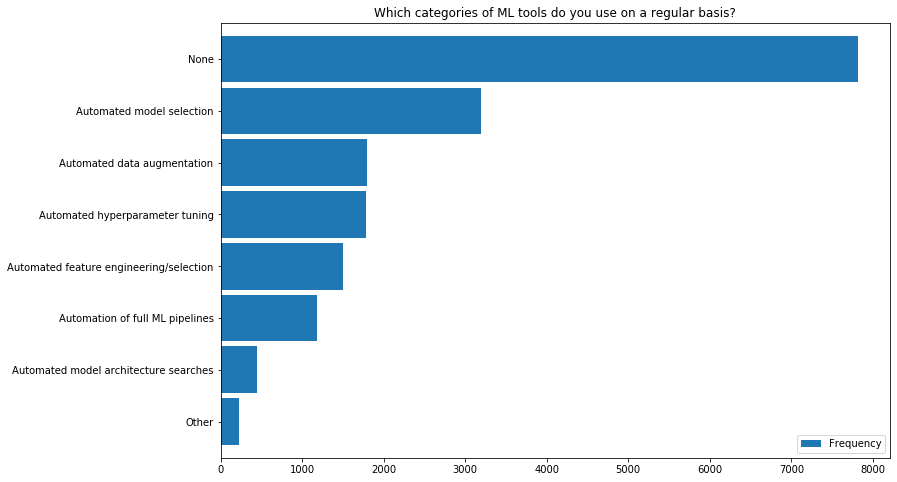

In [36]:
Q25         = kaggle.loc[:,"Q25_Part_1":"Q25_Part_8"].apply(lambda x: x.count()).to_frame()
Q25.columns = ["Frequency"]
Q25.index   = ["Automated data augmentation","Automated feature engineering/selection","Automated model selection",
               "Automated model architecture searches","Automated hyperparameter tuning","Automation of full ML pipelines",
               "None","Other"]
Q25.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q25)

Q25.plot.barh(width=0.9,figsize=(12, 8))
plt.gca().invert_yaxis()
plt.title('Which categories of ML tools do you use on a regular basis?')
plt.show()


                                                    Frequency
Image classification and other general purpose ...       3187
General purpose image/video tools                        2207
Image segmentation methods                               2061
Object detection methods                                 1872
None                                                     1203
Generative Networks                                      1081
Other                                                      51


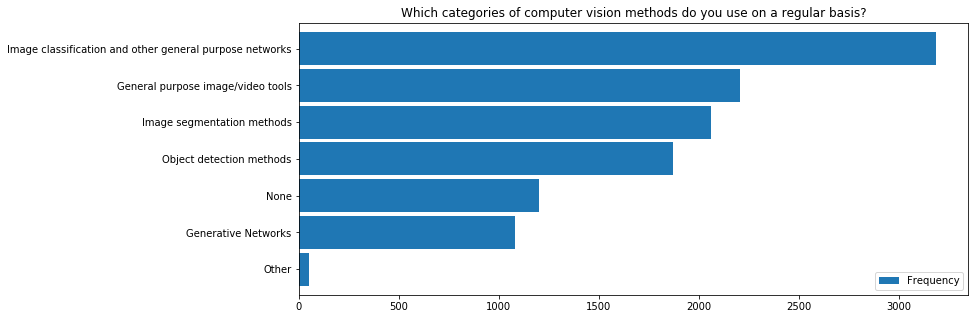

In [37]:
Q26         = kaggle.loc[:,"Q26_Part_1":"Q26_Part_7"].apply(lambda x: x.count()).to_frame()
Q26.columns = ["Frequency"]
Q26.index   = ["General purpose image/video tools","Image segmentation methods","Object detection methods",
               "Image classification and other general purpose networks","Generative Networks","None","Other"]
Q26.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q26)

Q26.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Which categories of computer vision methods do you use on a regular basis?')
plt.show()


                             Frequency
Word embeddings/vectors           2115
Encoder-decorder models           1368
Transformer language models       1031
None                              1027
Contextualized embeddings          562
Other                               49


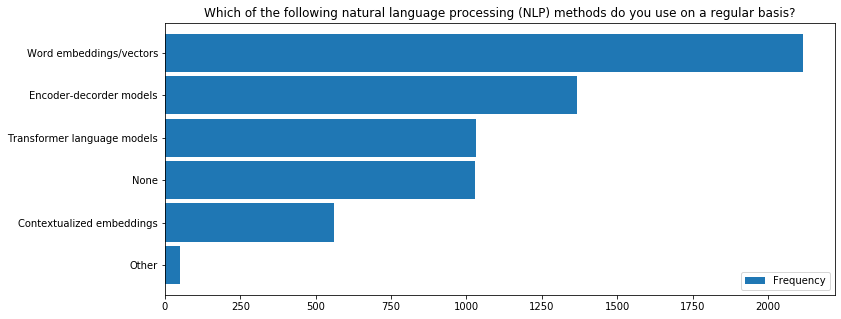

In [38]:
Q27         = kaggle.loc[:,"Q27_Part_1":"Q27_Part_6"].apply(lambda x: x.count()).to_frame()
Q27.columns = ["Frequency"]
Q27.index   = ["Word embeddings/vectors","Encoder-decorder models","Contextualized embeddings","Transformer language models",
              "None","Other"]
Q27.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q27)

Q27.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Which of the following natural language processing (NLP) methods do you use on a regular basis?')
plt.show()



              Frequency
Scikit-learn       9390
TensorFlow         5822
Keras              5756
RandomForest       4524
Xgboost            4243
PyTorch            3412
LightGBM           2166
None               1720
Caret              1139
Fast.ai             949
Spark MLib          910
Other               342


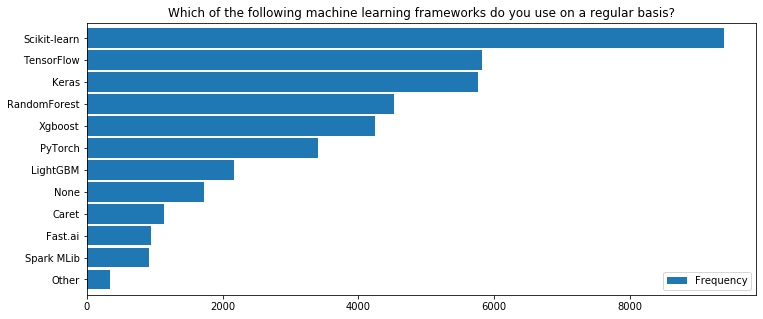

In [39]:
Q28         =  kaggle.loc[:,"Q28_Part_1":"Q28_Part_12"].apply(lambda x: x.count()).to_frame()
Q28.columns = ["Frequency"]
Q28.index   = ["Scikit-learn","TensorFlow","Keras","RandomForest","Xgboost","PyTorch","Caret","LightGBM",
           "Spark MLib","Fast.ai","None","Other"]
Q28.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q28)

Q28.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Which of the following machine learning frameworks do you use on a regular basis?')
plt.show()


                       Frequency
Amazon Web Services         2758
None                        2229
Google Cloud Platform       2134
Microsoft Azure             1356
IBM Cloud                    373
VMware Cloud                 171
Other                        170
Oracle Cloud                 162
Salesforce Cloud             115
Alibaba Cloud                110
SAP Cloud                     90
Red Hat Cloud                 78


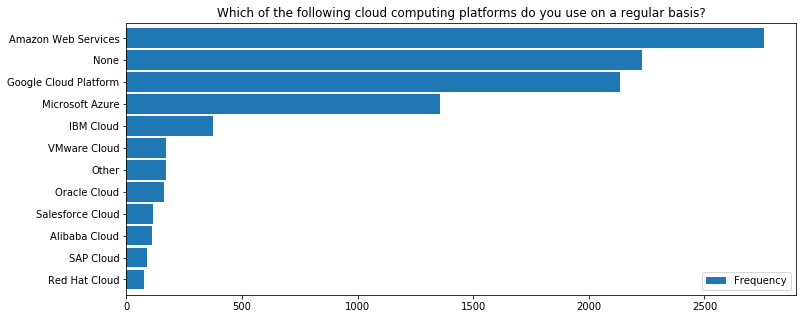

In [40]:
Q29         =  kaggle.loc[:,"Q29_Part_1":"Q29_Part_12"].apply(lambda x: x.count()).to_frame()
Q29.columns =  ["Frequency"]
Q29.index   =  ["Google Cloud Platform", "Amazon Web Services", "Microsoft Azure", "IBM Cloud", "Alibaba Cloud", "Salesforce Cloud",
               "Oracle Cloud", "SAP Cloud", "VMware Cloud", "Red Hat Cloud", "None","Other"]
Q29.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q29)

Q29.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Which of the following cloud computing platforms do you use on a regular basis?')
plt.show()



                                 Frequency
None                                  3155
AWS Elastic Compute Cloud (EC2)       1810
Google Compute Engine (GCE)           1138
AWS Lambda                             876
Azure Virtual Machines                 838
Google Cloud Functions                 702
Google App Engine                      597
Google Kubernetes Engine               526
Azure Container Service                395
AWS Elastic Beanstalk                  311
AWS Batch                              284
Other                                  239


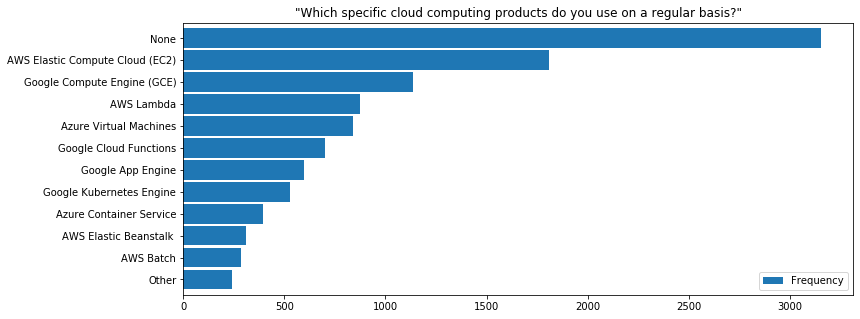

In [41]:
Q30         = kaggle.loc[:,"Q30_Part_1":"Q30_Part_12"].apply(lambda x: x.count()).to_frame()
Q30.columns = ["Frequency"]
Q30.index   = ["AWS Elastic Compute Cloud (EC2)","Google Compute Engine (GCE)","AWS Lambda","Azure Virtual Machines",
              "Google App Engine","Google Cloud Functions","AWS Elastic Beanstalk ","Google Kubernetes Engine","AWS Batch"
              ,"Azure Container Service","None","Other"]
Q30.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q30)

Q30.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('"Which specific cloud computing products do you use on a regular basis?"')
plt.show()


                             Frequency
None                              4133
Google BigQuery                    958
Databricks                         604
AWS Redshift                       562
Google Cloud Dataflow              525
AWS Elastic MapReduce              429
Microsoft Analysis Services        426
Google Cloud Pub/Sub               398
AWS Athena                         369
Teradata                           322
AWS Kinesis                        281
Other                              266


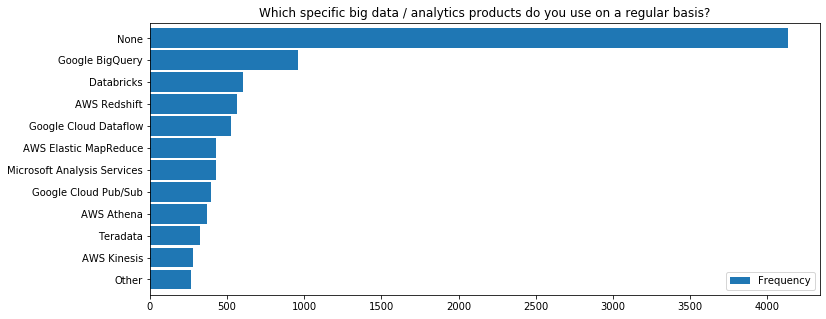

In [42]:
Q31         = kaggle.loc[:,"Q31_Part_1":"Q31_Part_12"].apply(lambda x: x.count()).to_frame()
Q31.columns = ["Frequency"]
Q31.index   = ["Google BigQuery","AWS Redshift","Databricks","AWS Elastic MapReduce","Teradata",'Microsoft Analysis Services',
              "Google Cloud Dataflow","AWS Athena","AWS Kinesis","Google Cloud Pub/Sub","None","Other"]
Q31.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q31)

Q31.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Which specific big data / analytics products do you use on a regular basis?')
plt.show()


                                      Frequency
None                                       4313
Google Cloud Machine Learning Engine        586
Azure Machine Learning Studio               581
Amazon SageMaker                            569
SAS                                         450
Google Cloud Speech-to-Text                 438
Cloudera                                    418
Google Cloud Natural Language               400
Google Cloud Vision                         372
Google Cloud Translation                    315
RapidMiner                                  265
Other                                       225


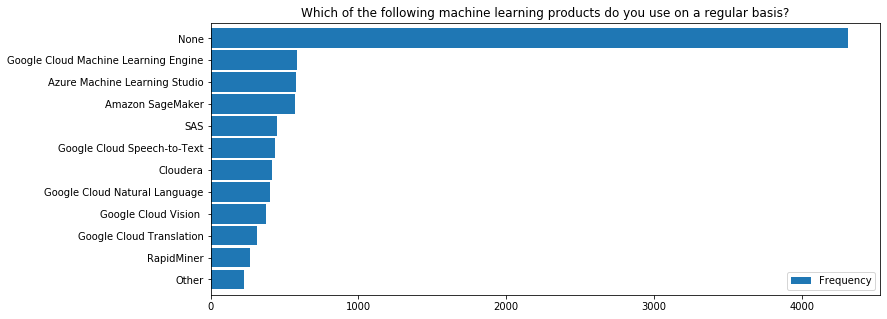

In [43]:
Q32         = kaggle.loc[:,"Q32_Part_1":"Q32_Part_12"].apply(lambda x: x.count()).to_frame()
Q32.columns = ["Frequency"]
Q32.index   = ["SAS","Cloudera","Azure Machine Learning Studio","Google Cloud Machine Learning Engine","Google Cloud Vision ",
              "Google Cloud Speech-to-Text","Google Cloud Natural Language","RapidMiner","Google Cloud Translation",
              "Amazon SageMaker","None","Other"]
Q32.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q32)

Q32.plot.barh(width=0.9,figsize=(12, 5))
plt.gca().invert_yaxis()
plt.title('Which of the following machine learning products do you use on a regular basis?')
plt.show()


                   Frequency
None                    5175
Auto-Sklearn             756
Google AutoML            498
Auto-Keras               465
Auto_ml                  279
H20 Driverless AI        277
Databricks AutoML        191
Tpot                     176
DataRobot AutoML         171
MLbox                    133
Other                    132
Xcessiv                   28


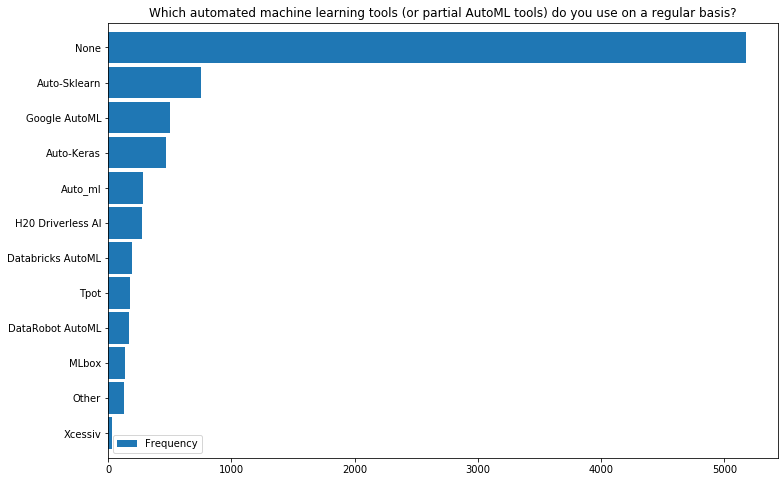

In [44]:
Q33         = kaggle.loc[ : ,"Q33_Part_1":"Q33_Part_12"].apply( lambda x: x.count()).to_frame()
Q33.columns = ["Frequency"]
Q33.index   = ["Google AutoML","H20 Driverless AI","Databricks AutoML","DataRobot AutoML","Tpot","Auto-Keras","Auto-Sklearn",
               "Auto_ml","Xcessiv","MLbox","None","Other"] 
Q33.sort_values( by = "Frequency", ascending = False, inplace = True)
print(Q33)


Q33.plot.barh( width = 0.9, figsize = (12 , 8) )
plt.gca().invert_yaxis() 
plt.title('Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?')
plt.show()


                                 Frequency
MySQL                                 3122
PostgresSQL                           2160
Microsoft SQL Server                  1852
'SQLite                               1527
None                                  1245
Oracle Database                       1192
AWS Relational Database Service        588
Microsoft Access                       547
Google Cloud SQL                       526
Azure SQL Database                     479
AWS DynamoDB                           415
Other                                  287


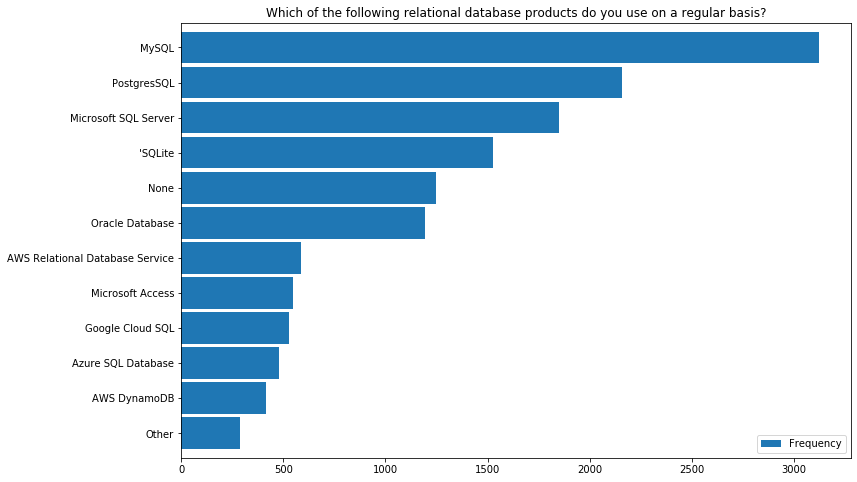

In [45]:
Q34         = kaggle.loc[:,"Q34_Part_1":"Q34_Part_12"].apply(lambda x: x.count()).to_frame()
Q34.columns = ["Frequency"]
Q34.index   = ["MySQL","PostgresSQL","'SQLite","Microsoft SQL Server","Oracle Database","Microsoft Access",
              "AWS Relational Database Service","AWS DynamoDB","Azure SQL Database","Google Cloud SQL","None","Other"]
Q34.sort_values(by="Frequency",ascending=False,inplace=True)
print(Q34)

Q34.plot.barh( width=0.9, figsize=(12, 8) )
plt.gca().invert_yaxis()
plt.title( 'Which of the following relational database products do you use on a regular basis?' )
plt.show()


## Prefernces

[1]Lardinois, Frederic; Mannes, John; Lynley, Matthew (March 8, 2017). "Google is acquiring data science community Kaggle". Techcrunch. Archived from the original on March 9, 2017. Retrieved March 9, 2017.<br/>
[2]"Google buys Kaggle and its gaggle of AI geeks". CNET. 2017-03-08. Retrieved 2018-06-01.